In [ ]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
df = pd.read_csv('winequality-white.csv', sep=";")

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.shape

(4898, 12)

# EDA

##Correlation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
corr = df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


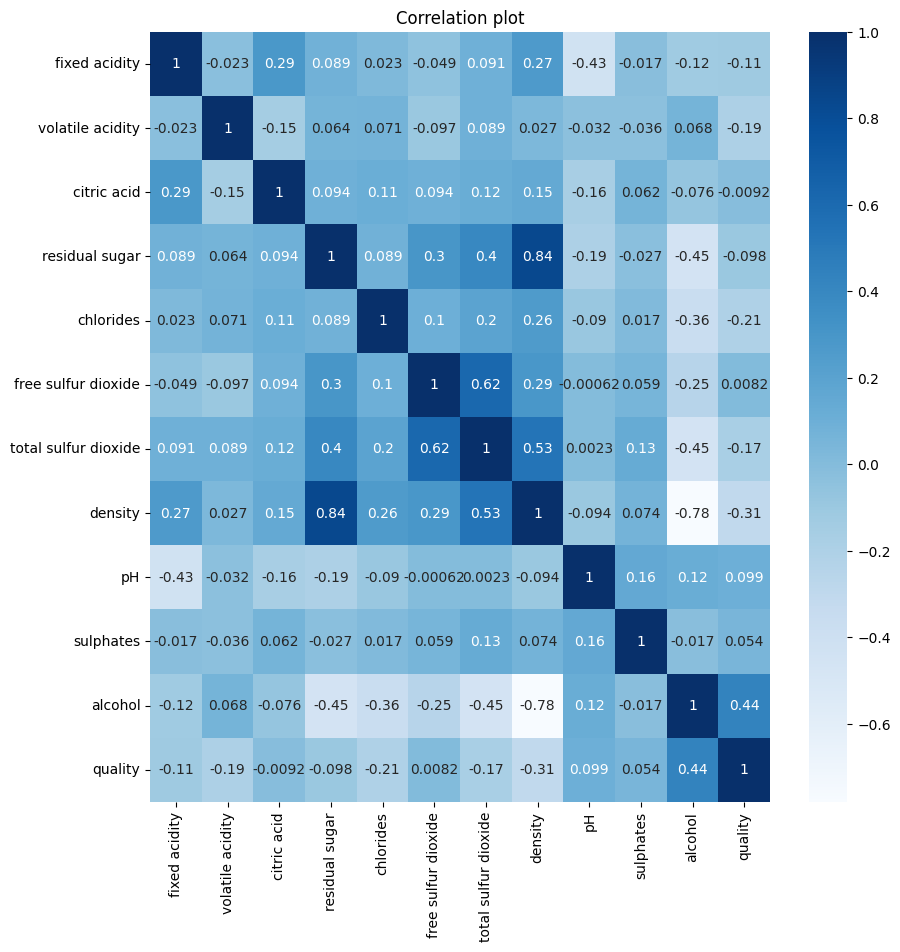

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation plot')
plt.show()

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


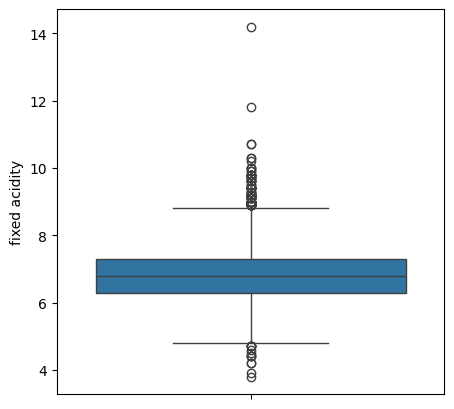

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(df['fixed acidity'])
plt.show()

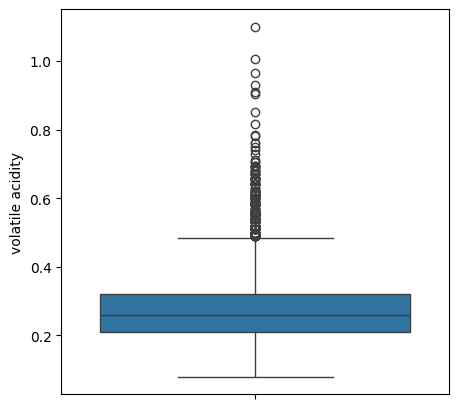

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(df['volatile acidity'])
plt.show()

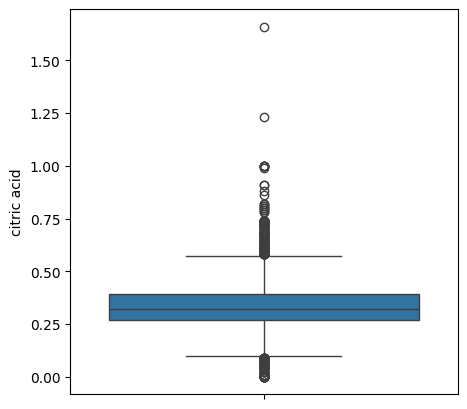

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(df['citric acid'])
plt.show()

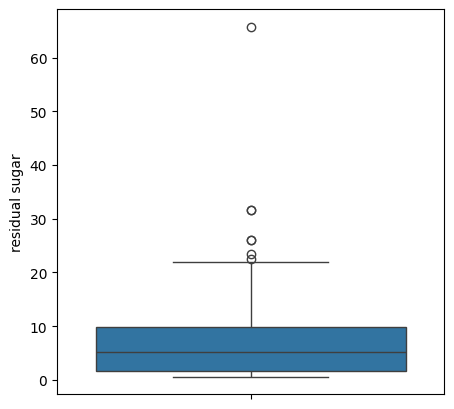

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(df['residual sugar'])
plt.show()

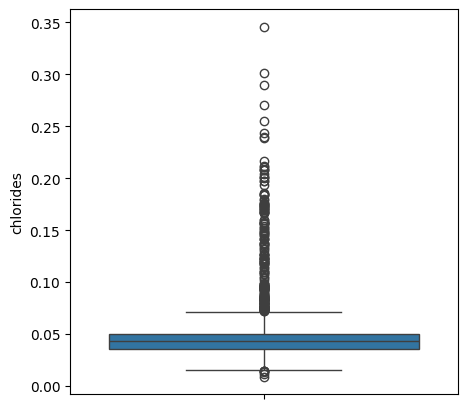

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(df['chlorides'])
plt.show()

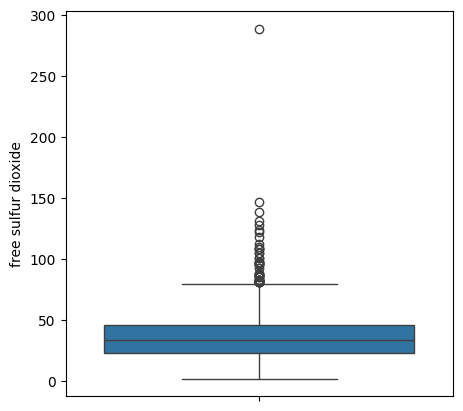

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(df['free sulfur dioxide'])
plt.show()

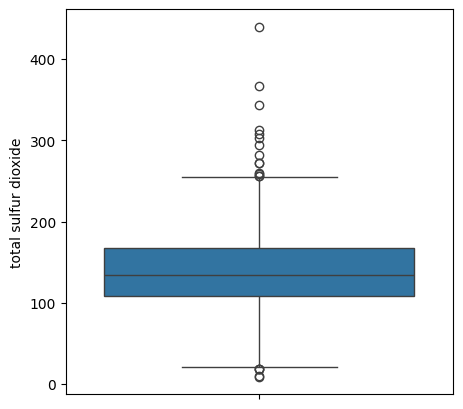

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(df['total sulfur dioxide'])
plt.show()

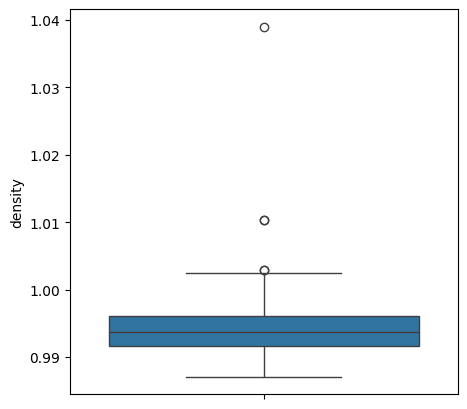

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(df['density'])
plt.show()

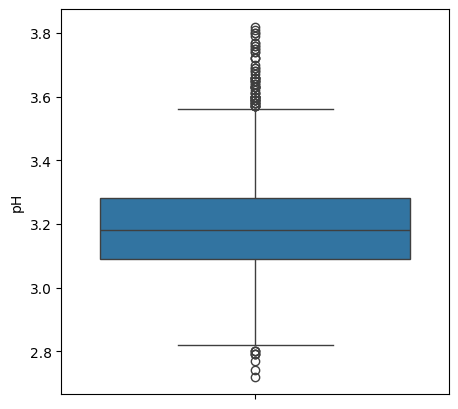

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(df['pH'])
plt.show()

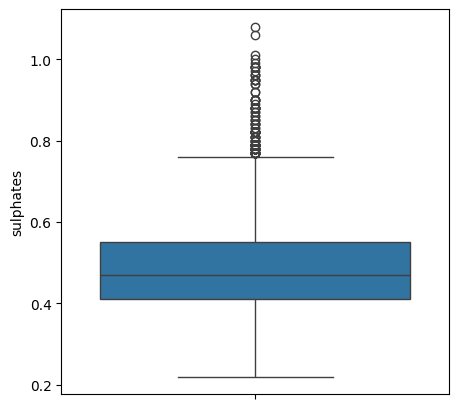

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(df['sulphates'])
plt.show()

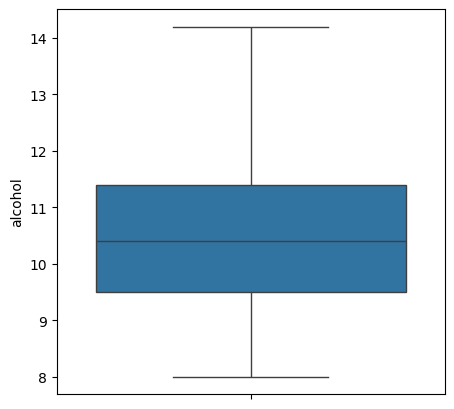

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(df['alcohol'])
plt.show()

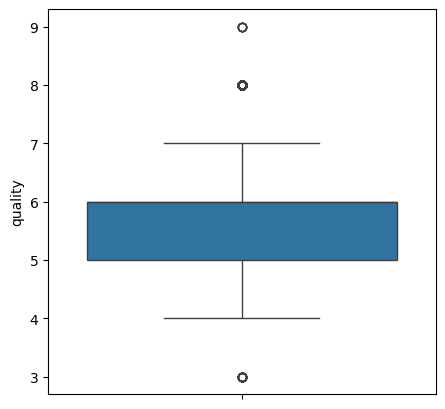

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(df['quality'])
plt.show()

In [ ]:
print(df.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


Outlier Detection and Imputation

In [ ]:
def count_outliers_zscore(df, threshold=3):
    outlier_count = 0
    for column in df.select_dtypes(include=[np.number]):  # Only apply to numeric columns
        mean_col = df[column].mean()
        std_col = df[column].std()
        z_scores = (df[column] - mean_col) / std_col
        # Find data points where Z-score is greater than threshold
        outlier_count += (z_scores.abs() > threshold).sum()
    return outlier_count

  # Find outliers using Z-score
outlier_count = count_outliers_zscore(df)
print("Outliers detected using Z-score:")
print(outlier_count)



Outliers detected using Z-score:
475


In [ ]:
def winsorized_data(df):
  for column in df.select_dtypes(include=[np.number]):
    df[column] = winsorize(df[column], limits=[0.05, 0.05])
  return df

Outlier Detection

In [ ]:
winsorized_df = winsorized_data(df)
print(winsorized_df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            15.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.6              0.29         0.30             1.1      0.027   
4897            6.0              0.21         0.38             1.1      0.027   

      free sulfur dioxide  

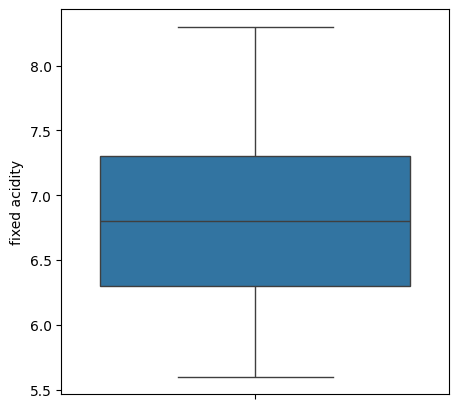

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(df['fixed acidity'])
plt.show()

#Machine Learning

##Train Test Split

In [ ]:
X = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
Y = df['quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7894)

Model Fitting

In [ ]:
#Fitting the model to the data
lr = LinearRegression()
lr.fit(X, Y)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print(y_pred)

[6.89744061 6.28288336 6.36171145 5.56606392 5.70124864 6.05488569
 5.99634721 5.70516733 5.31068822 5.76126325 5.99810152 6.19890212
 5.71977996 6.63248516 6.26261391 6.4109373  6.18811311 6.36587031
 6.08701574 5.40709154 5.15101688 6.01318137 6.11599759 5.30151117
 5.62790164 5.41447196 5.39798544 6.44080241 5.11677555 5.72575566
 6.20302872 6.3359229  6.24115052 6.26989651 6.60380675 5.99475359
 5.48409378 5.77494316 6.45860223 5.83894215 5.37771651 5.99617407
 5.26086478 6.48185367 5.86948553 5.51161581 6.2902135  6.57640312
 6.21517796 5.65181791 5.31754889 6.278369   6.60906912 5.78581853
 6.63484787 5.44452263 5.74475572 6.64079262 5.28586109 5.77707606
 5.35783825 6.21172151 5.54524766 6.58583867 6.48384019 5.80204383
 5.4388599  6.70149062 5.32114406 6.17884187 6.57733726 5.81737621
 5.80416333 5.66223607 5.96342368 6.57114214 5.61222694 5.19590579
 6.48565113 6.21652141 5.49564711 6.42897906 5.46178418 5.61737622
 6.03279474 6.10665025 5.39770439 6.66871479 6.31415061 5.0534



*   Error Analysis
*   Model Coefficients
*   Visualize (optional)
*   Residual Analysis



In [ ]:
# Evaluate the model on the test set
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared =False)  # RMSE
r_squared = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r_squared}")


Mean Absolute Error (MAE): 0.5172214758847664
Mean Squared Error (MSE): 0.3800956534108827
Root Mean Squared Error (RMSE): 0.6165189805763345
R-squared (R²): 0.3010718822728867


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Create a DataFrame for better visualization
coef_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)
print(coef_df)

                      Coefficient
pH                       0.787973
sulphates                0.680037
alcohol                  0.122142
fixed acidity            0.107036
residual sugar           0.079193
free sulfur dioxide      0.004156
total sulfur dioxide    -0.000592
citric acid             -0.025768
volatile acidity        -1.691608
chlorides               -2.031531
density               -165.809953


In [ ]:
# Print the intercept value
intercept_value = lr.intercept_
print(f"Intercept (b0): {intercept_value:.3f}")


Intercept (b0): 165.839


Residual Analysis

In [ ]:
# Calculate residuals
residuals = y_test - y_pred


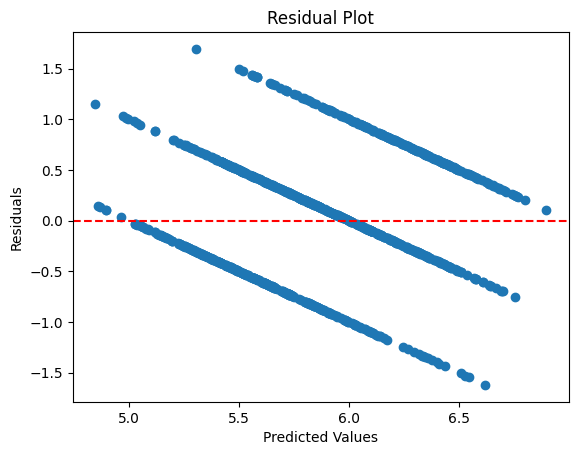

In [ ]:
# Residual plot
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()